## A. Introduction 

### Problem Statement

Meetup is an organizing tool for a variety of activities including hobbies, work-oriented programs and other fun/social activities. Rather than a tool, it is known as one of the most popular social networking websites in today’s world. In addition to getting people connected virtually through the application, Meetup has greatly helped in connecting people with similar interests in the same location. It is a resourceful platform, that is letting people develop their network by exploring, teaching and learning new aspects. Apart from being a mere participant, this application lets people organize and publicize their events and develop their own groups.

As of 2017, Meetup.com has over 32 million users with nearly 300,000 groups across 182 countries. Within each geographic location, there are an umpteen number of groups, each offering a broad range of topics. This way, it is a very easy and accessible application that will let a user discover groups with coherent interests.


## Questions answered using this analysis

1. How has Meetup.com’s <span style="color: #ce31bc;">popularity</span> changed over time?
2. How does event popularity vary by <span style="color: #ce31bc;">different features</span>?
3. What <span style="color: #ce31bc;">topics/categories</span> are popular in each city? What can we learn about the crowd in each city?
4. How do <span style="color: #ce31bc;">member interests</span> relate to other member interests?



### Dataset Description

<ul>
    <li>Sourced from <a href="https://www.kaggle.com/sirpunch/meetups-data-from-meetupcom/home">Meetup.com Kaggle competition</a></li>
    <li>Contains 9 separate CSVs (categories, cities, groups, topics, venues, etc.)</li>
    <li>Contains details for over 5800 events in Chicago, New York, and San Francisco</li>
</ul>


##  B. Data Importing
### Importing all the necessary packages 

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Reading data into dataframes

In [83]:
df_events = pd.read_csv('data/events.csv')
df_categories = pd.read_csv('data/categories.csv')
df_cities = pd.read_csv('data/cities.csv')
df_groups = pd.read_csv('data/groups.csv')
df_group_topics = pd.read_csv('data/groups_topics.csv',encoding='latin-1')
df_members = pd.read_csv('data/members.csv',encoding='latin-1')

In [84]:
df_member_topics = pd.read_csv('data/members_topics.csv',encoding='latin-1')
df_topics = pd.read_csv('data/topics.csv',encoding='latin-1')
df_venues = pd.read_csv('data/venues.csv',encoding='latin-1')

## C. Data Cleaning 

#### City Cleaning:
Since there are many sublevels for each city, we merged them so that there are only 3 cities in total

In [85]:
df_cities['city'].unique()

array(['West New York', 'New York', 'New York Mills', 'East Chicago',
       'North Chicago', 'West Chicago', 'Chicago Heights',
       'Chicago Ridge', 'Chicago', 'South San Francisco', 'San Francisco',
       'Chicago Park'], dtype=object)

In [86]:
def city_clean(x):
    if 'New York' in x:
        x='New York'
    elif 'Chicago' in x:
        x='Chicago'
    else:
        x='San Francisco'
    return x

In [87]:
df_cities['city']=df_cities['city'].apply(lambda x:city_clean(x))
df_groups['city'] = df_groups['city'].apply(lambda x:city_clean(x))
df_members['city']=df_members['city'].apply(lambda x:city_clean(x))

In [88]:
## Remove all outlier coordinates

## D. Analysis 
### 1. Trends in growth rate for Meetup
#### 1.1 Growth rate in terms of the number of new groups added every year 

In [89]:
## Extracting the year
df_groups['year']=df_groups['created'].apply(lambda x: int(str(x).split('-')[0]))

In [90]:
## Pivot Table to summarise the number of groups adding every year
df_groups_pivot = df_groups.pivot_table(values='group_id',index='city',
                                           columns='year',aggfunc=len)
df_groups_pivot

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
city,,,,,,,,,,,,,,,,
Chicago,9,28,6,10,56,75,60,90,121,106,198,180,272,373,562,1034
New York,49,70,20,39,175,217,242,292,273,403,511,614,778,973,1451,2469
San Francisco,7,9,3,2,36,62,111,126,147,211,275,357,478,632,793,1325


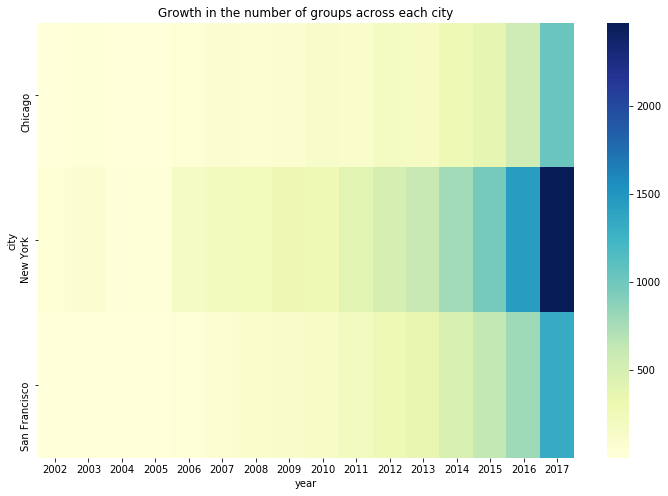

In [91]:
plt.figure(figsize=(12,8))
plt.title("Growth in the number of groups across each city")
sns.heatmap(df_groups_pivot,cmap="YlGnBu")

In [92]:
df_groups_pivot.to_csv('groups_trend.csv')

#### 1.2 Growth rate in terms of the new members joining each year
In the members dataframe, there will be multiple entries for the same member who is a part of multiple groups. This is because the memberID along with the Group ID is used a dataframe. 

Therefore, inorder to find the unique number of members joined in a particular year,
1. Members dataframe was grouped
2. Each group was sorted based on the join date ( in ascending order).
3. The first record in every group object was obtained to find actual join date for every member.
4. The year of joining was extracted from these records

In [93]:
## Year Extraction
df_members['year_joined']=df_members['joined'].apply(lambda x: int(str(x).split('-')[0]))

In [94]:
len(df_members['member_id'].unique())

1087923

In [95]:
## Grouping by memberId and sorting the group object and extracting the first record from the sorted group
df_unique_members = df_members.sort_values('joined').groupby(by=['member_id']).head(1)

In [96]:
## Pivot Table to summarise the number of members joining every year
df_members_pivot = df_unique_members.pivot_table(values='member_id',index='city',
                                           columns='year_joined',aggfunc=len)
df_members_pivot

year_joined,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
city,,,,,,,,,,,,,,,,
Chicago,5,175,269,375,1426,2449,4001,6287,7819,10382,17897,24734,28331,38834,45266,47800
New York,52,1784,1166,1149,4202,8491,12792,21343,24480,33941,49630,64129,71621,83353,92010,110741
San Francisco,8,84,109,229,833,2743,4039,6624,8727,13008,22226,30607,37120,44850,47847,51935


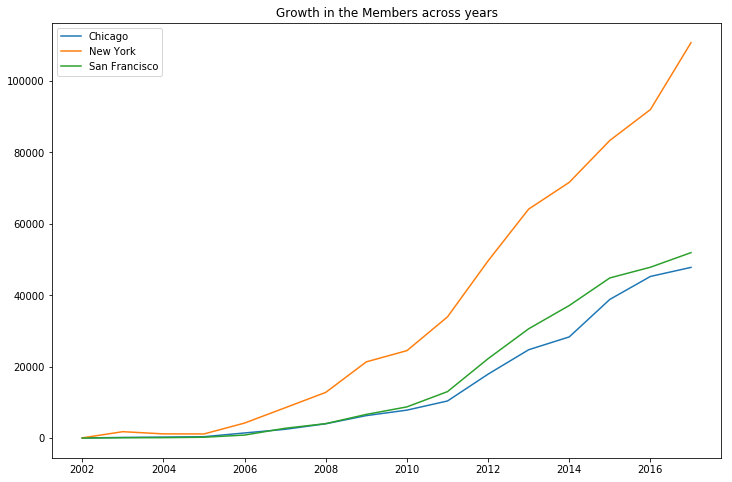

In [97]:
## Line plot depicting the member growth rate across each city
plt.figure(figsize=(12,8))
plt.plot(df_members_pivot.columns,df_members_pivot.loc['Chicago'])
plt.plot(df_members_pivot.columns,df_members_pivot.loc['New York'])
plt.plot(df_members_pivot.columns,df_members_pivot.loc['San Francisco'])
plt.title('Growth in the Members across years')
plt.legend()

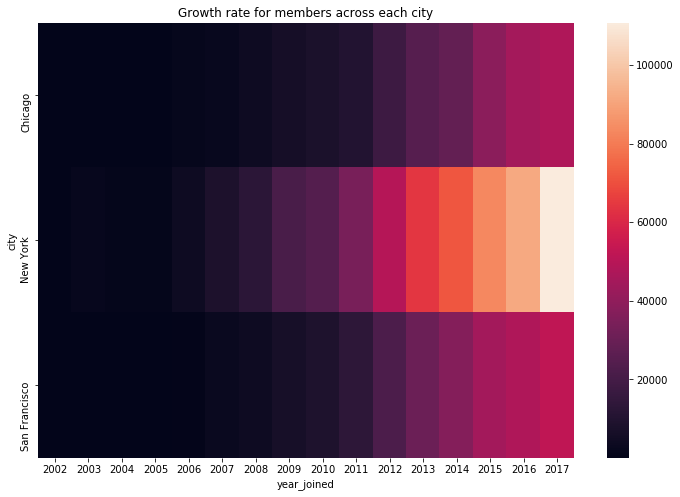

In [98]:
## Heatmap depicting the member growth rate across each city 
plt.figure(figsize=(12,8))
plt.title("Growth rate for members across each city")
sns.heatmap(df_members_pivot)

In [99]:
df_members_pivot.to_csv('members_pivot.csv')

### 2. Events Popularity

The first question of interest being 'Event Popularity', we wanted to check for popular events. The popularity of each event was assesed based on the number of people who RSVPd for the event and the total number of people in that group. 

Event popularity score is defined to be the ratio of number of people who RSVPd for the event and the count of members in that group.

Inorder to get these two columns in the same dataframe, events table was merged with the groups table on GroupID.

In [100]:
df_events_groups= df_events.join(df_groups,lsuffix='_events', rsuffix='_groups')

In [101]:
df_events.columns

Index(['event_id', 'created', 'description', 'duration', 'event_url',
       'fee.accepts', 'fee.amount', 'fee.currency', 'fee.description',
       'fee.label', 'fee.required', 'group.created', 'group.group_lat',
       'group.group_lon', 'group_id', 'group.join_mode', 'group.name',
       'group.urlname', 'group.who', 'headcount', 'how_to_find_us',
       'maybe_rsvp_count', 'event_name', 'photo_url', 'rating.average',
       'rating.count', 'rsvp_limit', 'event_status', 'event_time', 'updated',
       'utc_offset', 'venue.address_1', 'venue.address_2', 'venue.city',
       'venue.country', 'venue_id', 'venue.lat',
       'venue.localized_country_name', 'venue.lon', 'venue.name',
       'venue.phone', 'venue.repinned', 'venue.state', 'venue.zip',
       'visibility', 'waitlist_count', 'why', 'yes_rsvp_count'],
      dtype='object')

In [102]:
df_events_groups.columns

Index(['event_id', 'created_events', 'description_events', 'duration',
       'event_url', 'fee.accepts', 'fee.amount', 'fee.currency',
       'fee.description', 'fee.label', 'fee.required', 'group.created',
       'group.group_lat', 'group.group_lon', 'group_id_events',
       'group.join_mode', 'group.name', 'group.urlname', 'group.who',
       'headcount', 'how_to_find_us', 'maybe_rsvp_count', 'event_name',
       'photo_url', 'rating.average', 'rating.count', 'rsvp_limit',
       'event_status', 'event_time', 'updated', 'utc_offset_events',
       'venue.address_1', 'venue.address_2', 'venue.city', 'venue.country',
       'venue_id', 'venue.lat', 'venue.localized_country_name', 'venue.lon',
       'venue.name', 'venue.phone', 'venue.repinned', 'venue.state',
       'venue.zip', 'visibility_events', 'waitlist_count', 'why',
       'yes_rsvp_count', 'group_id_groups', 'category_id', 'category.name',
       'category.shortname', 'city_id', 'city', 'country', 'created_groups',
       '

 Choosing a subset of necessary columns 

In [103]:
df_events_subset = df_events_groups[['event_id','duration','description_events','event_url','fee.accepts','fee.required',
'event_time','yes_rsvp_count','members','rating','group_id_groups','utc_offset_events','category.shortname','city','venue.lat'
                                    ,'venue.lon','venue_id','join_mode']]

In [104]:
df_events_subset.head()

,event_id,duration,description_events,event_url,fee.accepts,fee.required,event_time,yes_rsvp_count,members,rating,group_id_groups,utc_offset_events,category.shortname,city,venue.lat,venue.lon,venue_id,join_mode
0,153868222,20700,Solve the murder case while eating a 3 course ...,https://www.meetup.com/SanFranciscoStartupFun/...,others,0,2017-10-30 02:30:00,72,1440,4.39,6388,-25200,health-wellbeing,New York,37.797950,-122.405690,23729697,open
1,184167702,77400,NOTE: This event is EVERY FRIDAY!! Signup is a...,https://www.meetup.com/hr-and-tech-sf/events/1...,others,0,2017-10-28 04:00:00,179,969,4.31,6510,-25200,community-environment,New York,37.798172,-122.405457,16948982,open
2,215200502,37800,We'll be heading out with a group of travelers...,https://www.meetup.com/hr-and-tech-sf/events/2...,others,0,2017-10-27 03:00:00,45,2930,4.84,8458,-25200,pets-animals,New York,37.797516,-122.407394,24717469,open
3,220826782,113400,NOTE: This event is EVERY FRIDAY!! Signup is a...,https://www.meetup.com/SanFranciscoStartupFun/...,others,0,2017-10-28 04:00:00,198,5080,4.46,8940,-25200,sci-fi-fantasy,New York,37.798036,-122.405442,724783,open
4,227948102,36000,"Aussie Aussie Aussie, Oi Oi Oi! Join us for th...",https://www.meetup.com/hr-and-tech-sf/events/2...,others,0,2018-01-26 01:00:00,24,2097,4.09,10104,-28800,pets-animals,New York,37.798050,-122.405251,20984572,open


In [ ]:
df_events_subset['event_popularity'] = df_events_subset['yes_rsvp_count']/df_events_subset[['members','yes_rsvp_count']].max(axis=1)

#### 2.1 Feature Engineering - Non-text based attributes

Since we wanted to check the significance of the factors influencing the event popularity, we developed new features such as
1. Day of the event 
   For every event, based on the event date, we computed the day of the week.
   

2. Time of the day 
    For the given data, the time at which the event was happening was given in the local time format. As our first step, we     converted all the timestamps into the same scale- UTC using the given features - event time and UTC offset 
    
    After getting the local timestamp of each event, based on some general rules, we categorised the time at which each         event was scheduled.
    - Morning  - 5am - 11am
    - Afternoon- 11am - 4pm
    - Evening  - 4pm - 10pm
    - Night    - beyond 10pm 
    
    
3. Event Popularity Label
    Using the median value of the event popularity score as the threshold, a event popularity label is derived.



In [ ]:
df_events_subset['event_time'] = pd.to_datetime(df_events_subset['event_time'])
df_events_subset['Day'] = df_events_subset['event_time'].dt.weekday_name
df_events_subset['utc_offset_events']=pd.to_timedelta(df_events_subset['utc_offset_events'], unit='s')
df_events_subset['Event Local Start Time'] = df_events_subset['event_time']+df_events_subset['utc_offset_events']
df_events_subset['Event Local Start Time'] = df_events_subset['Event Local Start Time'].dt.time

In [107]:
def time_of_day(x):
    x = int(str(x).split(":")[0])
    if(x>=5 and x<=11):
        return 'Morning'
    elif(x>11 and x<=16):
        return 'Afternoon'
    elif(x>16 and x<=22):
        return 'Evening'
    else:
        return 'Night'

In [ ]:
df_events_subset['Time of the Day'] = df_events_subset['Event Local Start Time'].apply(lambda x:time_of_day(x))
# df_events_subset['Hour']=df_events_subset['Event Local Start Time'].apply(lambda x:int(str(x).split(":")[0]))

In [109]:
df_events_subset.dtypes

event_id                           object
duration                            int64
description_events                 object
event_url                          object
fee.accepts                        object
fee.required                        int64
event_time                 datetime64[ns]
yes_rsvp_count                      int64
members                             int64
rating                            float64
group_id_groups                     int64
utc_offset_events         timedelta64[ns]
category.shortname                 object
city                               object
venue.lat                         float64
venue.lon                         float64
venue_id                            int64
join_mode                          object
event_popularity                  float64
Day                                object
Event Local Start Time             object
Time of the Day                    object
dtype: object

In [110]:
median_popularity = df_events_subset['event_popularity'].median()

In [111]:
def popularity(x):
    if(x>=median_popularity):
        return 'popular'
    else:
        return 'not popular'
    

In [ ]:
df_events_subset['Popularity'] = df_events_subset['event_popularity'].apply(lambda x:popularity(x))

In [113]:
df_events_subset['Popularity'].value_counts()

popular        2905
not popular    2902
Name: Popularity, dtype: int64

In [114]:
df_events_subset['Time of the Day'].value_counts()

Evening      3440
Afternoon    1365
Morning      1001
Night           1
Name: Time of the Day, dtype: int64

#### 2.2 Geography of Events
To understand the geography of popular events and their distribution in terms of geography, venues dataframe was merged along with the events dataframe on the event ID.


In [34]:
df_venues.columns

Index(['venue_id', 'address_1', 'city', 'country', 'distance', 'lat',
       'localized_country_name', 'lon', 'venue_name', 'rating', 'rating_count',
       'state', 'zip', 'normalised_rating'],
      dtype='object')

In [35]:
df_events_subset.columns

Index(['event_id', 'duration', 'description_events', 'event_url',
       'fee.accepts', 'fee.required', 'event_time', 'yes_rsvp_count',
       'members', 'rating', 'group_id_groups', 'utc_offset_events',
       'category.shortname', 'city', 'venue.lat', 'venue.lon', 'venue_id',
       'join_mode', 'event_popularity', 'Day', 'Event Local Start Time',
       'Time of the Day', 'Popularity'],
      dtype='object')

In [36]:
df_events_venues = df_events_subset.join(df_venues[['venue_id', 'lat', 'lon']],
                                         lsuffix='_Events',rsuffix='_Venues')
df_events_venues.columns

Index(['event_id', 'duration', 'description_events', 'event_url',
       'fee.accepts', 'fee.required', 'event_time', 'yes_rsvp_count',
       'members', 'rating', 'group_id_groups', 'utc_offset_events',
       'category.shortname', 'city', 'venue.lat', 'venue.lon',
       'venue_id_Events', 'join_mode', 'event_popularity', 'Day',
       'Event Local Start Time', 'Time of the Day', 'Popularity',
       'venue_id_Venues', 'lat', 'lon'],
      dtype='object')

In [37]:
## By Day , time 
df_events_by_day_time = df_events_venues[['event_id','Day','Time of the Day','city','Popularity','event_popularity',
                                          'lat', 'lon']]
df_events_by_day_time.to_csv('Events_By_day_time.csv')

### Time of Day

<img src="./images/tod_map_NY.png"/>
<img src="./images/tod_map_SF.png"/>
<img src="./images/tod_map_CHI.png"/>

#### Findings

We see that events occurring early in the morning and in the evening are the most popular. Events that start at night are not as popular or as common. We expect this as many people want to go to events before and after work.

### Day of Week

<img src="./images/dow_map_NY.png"/>
<img src="./images/dow_map_SF.png"/>
<img src="./images/dow_map_CHI.png"/>

Our hypothesis was that events on Friday, Saturday, and Sunday would be most popular. While there is some truth to this claim, we also see that there are many events (albeit slightly less popular) held on Tuesday and Wednesday. This seems strange to us (as students at least) that people look for interaction *during* the week.

#### 2.3 Event Popularity- Feature Engineering - Text Based Attributes
We wanted to find the most important words in the Event Description that are associated with popular events across each city. 

An own vocabulary of words were built with the most frequently occuring insignificant words ( that are not stop words).


Here are the <b> Text Preprocessing Steps</b>.
1. Removing numerical values 
2. Removing time information 
3. Removing punctuations
4. Lemmatizing the words
5. Removing stop words
6. Removing insignificant words that were identified and built as a vocabulary

A <b> Count Vectoriser </b> was used to obtain the word counts. A minimum threshold was set in order to eliminate the rare words.



In [38]:
def preprocessing(df):
    from nltk.stem import WordNetLemmatizer
    from nltk.corpus import stopwords 
    from nltk.tokenize import word_tokenize
    import re
    import string
    stop_words = set(stopwords.words('english')) 
    wordnet_lemmatizer = WordNetLemmatizer()
    own_vocab = ['www','https','am','pm','href','http','com','meetup','rsvp','link','event','info','meet']
    number_regex = re.compile('[0-9]+')
    time_regex = re.compile('[0-9]*[0-9]*[:]*[0-9]*[0-9]*[AaPp][Mm]')
    regex = re.compile('[%s]' % re.escape(string.punctuation)) ## Removing all punctuations
    new_text = []
    for i in range(len(df['description_events'])):
        new = number_regex.sub('',str(df['description_events'].iloc[i]))
        new = time_regex.sub('',new.strip())
        new = regex.sub(' ', new.strip().replace("'", " ")) ## Replacing apostrophe
        tok = word_tokenize(new.lower())
        new_tok = []
        for j in tok:
            j = wordnet_lemmatizer.lemmatize(j.strip())
            if j not in stop_words:
                if j not in own_vocab:
                    new_tok.append(j) ## Processing Each word
        new_text.append(' '.join(new_tok))
    return new_text

In [39]:
def generate_df_wordcounts(new_text):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer(stop_words='english',min_df=0.1)
    X_train_updated = vectorizer.fit_transform(new_text)
    df_test = pd.DataFrame()
    df_test['Features']=vectorizer.get_feature_names()
    df_test['Occurences']=np.asarray(X_train_updated.sum(axis=0)).T
    df_test.sort_values(by='Occurences',axis=0, ascending=False,inplace=True)
    return df_test

#### Word Counts for Popular Events in New York

In [40]:
## All  in NY
df_events_NY = df_events_subset[df_events_subset['city']=='New York']
NY_descriptions = preprocessing(df_events_NY)
df_words_NY = generate_df_wordcounts(NY_descriptions)
df_words_NY['Occurences'].sum()

33240

In [41]:
df_popular_NY = df_events_subset[df_events_subset['Popularity']=='popular']
df_popular_NY= df_popular_NY[df_popular_NY['city']=='New York']
popular_descriptions_NY = preprocessing(df_popular_NY)
len(popular_descriptions_NY)
df_popular_words_NY = generate_df_wordcounts(popular_descriptions_NY)
df_popular_words_NY['Weighted_Occurences']= df_popular_words_NY['Occurences']/df_words_NY['Occurences'].sum()
df_popular_words_NY.head()


,Features,Occurences,Weighted_Occurences
3,business,707,0.021270
17,great,568,0.017088
36,new,567,0.017058
39,people,545,0.016396
6,club,519,0.015614


<img src="./images/wordcloud_ny.jpg"/>

#### Word Counts for Popular Events in Chicago

In [42]:
## All  in Chicago
df_events_Chicago = df_events_subset[df_events_subset['city']=='Chicago']
Chicago_descriptions = preprocessing(df_events_Chicago)
len(Chicago_descriptions)
df_words_chicago = generate_df_wordcounts(Chicago_descriptions)
df_words_chicago['Occurences'].sum()

11883

In [43]:
df_popular_Chicago = df_events_subset[df_events_subset['Popularity']=='popular']
df_popular_Chicago= df_popular_Chicago[df_popular_Chicago['city']=='Chicago']
popular_descriptions_Chicago = preprocessing(df_popular_Chicago)
df_popular_words_Chicago = generate_df_wordcounts(popular_descriptions_Chicago)
df_popular_words_Chicago['Weighted_Occurences']= df_popular_words_Chicago['Occurences']/df_words_chicago['Occurences'].sum()
df_popular_words_Chicago.head()

,Features,Occurences,Weighted_Occurences
34,new,230,0.019355
16,great,227,0.019103
37,people,218,0.018346
45,toastmaster,216,0.018177
3,business,216,0.018177


<img src="./images/wordcloud_chi.JPG" />

#### Word Counts for Popular Events in San Francisco

In [44]:
## All  in SF
df_events_SF = df_events_subset[df_events_subset['city']=='San Francisco']
SF_descriptions = preprocessing(df_events_SF)
len(SF_descriptions)
df_words_SF = generate_df_wordcounts(SF_descriptions)
df_words_SF['Occurences'].sum()

14730

In [45]:
df_popular_SF = df_events_subset[df_events_subset['Popularity']=='popular']
df_popular_SF= df_popular_SF[df_popular_SF['city']=='San Francisco']
popular_descriptions_SF = preprocessing(df_popular_SF)
df_popular_words_SF = generate_df_wordcounts(popular_descriptions_SF)
df_popular_words_SF['Weighted_Occurences']= df_popular_words_SF['Occurences']/df_words_SF['Occurences'].sum()
df_popular_words_SF.head()

,Features,Occurences,Weighted_Occurences
3,business,264,0.017923
16,great,257,0.017447
6,club,227,0.015411
29,networking,227,0.015411
38,toastmaster,223,0.015139


<img src="./images/wordcloud_sf.JPG"/>

In [46]:
## CSV Files for all the dfs
df_popular_words_NY.to_csv('popular_Words_NY.csv')
df_popular_words_Chicago.to_csv('popular_Words_Chicago.csv')
df_popular_words_SF.to_csv('popular_Words_SF.csv')

In [47]:
len(popular_descriptions_SF)

737

### 3. Crowd Analysis across city 
#### 3.1 Distribution of categories across each city
Though the word clouds give a fair picture about the crowd across each city, we wanted to analyse this aspect further. In order to address this question, we combined the results we analysed the distribution of various categories across each city and found out the ratio of people in the city who are interested in a particular category.

Some of the ratios are greater than 1, this is because a member can be in multiple groups and would be counted more than once for each category


In [48]:
df_cities_agg = df_cities.groupby(['city']).sum()['member_count']
df_cities_agg.head()

city
Chicago           91430
New York         230059
San Francisco     60862
Name: member_count, dtype: int64

In [49]:
df_groups_category_pivot = df_groups.pivot_table(index='category.name',columns='city',values='members',aggfunc=sum)

In [50]:
df_groups_category_pivot['Chicago %']=df_groups_category_pivot['Chicago']/df_cities_agg['Chicago']
df_groups_category_pivot['NY %']=df_groups_category_pivot['New York']/df_cities_agg['New York']
df_groups_category_pivot['SF %']=df_groups_category_pivot['San Francisco']/df_cities_agg['San Francisco']
df_groups_category_pivot

city,Chicago,New York,San Francisco,Chicago %,NY %,SF %
category.name,,,,,,
LGBT,39556,141130,47876,0.432637,0.613451,0.786632
alternative lifestyle,14707,34004,14476,0.160855,0.147806,0.237850
book clubs,18362,37202,13601,0.200831,0.161706,0.223473
career/business,176252,733670,332193,1.927726,3.189052,5.458135
cars/motorcycles,3866,6058,4457,0.042284,0.026332,0.073231
community/environment,23156,77108,40285,0.253265,0.335166,0.661907
dancing,18284,133540,20488,0.199978,0.580460,0.336630
education/learning,22470,101685,34591,0.245762,0.441995,0.568351
fashion/beauty,15924,80577,8235,0.174166,0.350245,0.135306


### Bubble Charts

#### New York

<img src="./images/category_bubbles_ny.JPG" />

#### Chicago

<img src="./images/category_bubbles_chi.JPG" />

#### San Francisco

<img src="./images/category_bubbles_sf.JPG" />


We see that technology and career/business are popular in all 3 cities. Outdoor activities or events are more popular in Chicago and San Francisco, relative to New York.

In [51]:
df_groups_category_pivot.to_csv('Groups_Categories_Distribution.csv')

#### 3.2 Cooccurence of categories
In order to analyse the cooccurence of categories and develop a network analysis within each city, we had to construct a cooccurence matrix and plot it.

Steps for constructing a cooccurence matrix:
1. Create a subset of members in each city with relevant columns - memberID, member_name and group_ID
2. Create the subset of Groups Table with relevant columns - Group ID and category name
3. Join the two tables on Group ID to find the all the categories a member is associated with
4. Create np.zero matrix with dimensions being the number of unique categories 
        (i,j) will be the combination of category_i and category_j
5. For every unique member, find all the pairs of categories he/she is interested in and add 1 for each entry. 

In [52]:
df_members.head()

,member_id,bio,city,country,hometown,joined,lat,link,lon,member_name,state,member_status,visited,group_id,year_joined
0,3,not_found,New York,us,"New York, NY",2007-05-01 22:04:37,40.72,http://www.meetup.com/members/3,-74.0,Matt Meeker,NY,active,2009-09-18 18:32:23,490552,2007
1,3,not_found,New York,us,"New York, NY",2011-01-23 14:13:17,40.72,http://www.meetup.com/members/3,-74.0,Matt Meeker,NY,active,2011-03-20 01:02:11,1474611,2011
2,3,"Hi, I'm Matt. I'm an entrepreneur who has star...",New York,us,"New York, NY",2010-12-30 18:47:34,40.72,http://www.meetup.com/members/3,-74.0,Matt Meeker,NY,active,2011-01-18 20:37:23,1490492,2010
3,3,"Hi, I'm Matt. I'm an entrepreneur who has star...",New York,us,"New York, NY",2011-01-03 14:45:21,40.72,http://www.meetup.com/members/3,-74.0,Matt Meeker,NY,active,2011-07-23 03:42:28,1515830,2011
4,3,"Hi, I'm Matt. I'm an entrepreneur who has star...",New York,us,"New York, NY",2010-12-30 18:34:50,40.72,http://www.meetup.com/members/3,-74.0,Matt Meeker,NY,active,2011-06-13 18:33:23,1574965,2010


In [53]:
df_members['city'].unique()

array(['New York', 'San Francisco', 'Chicago'], dtype=object)

In [54]:
df_members_temp= df_members[df_members['city']=='Chicago']

In [55]:
df_members_temp = df_members_temp[['member_id','member_name','group_id']]

In [56]:
df_groups_temp = df_groups[['group_id','category.name']]

In [57]:
df_members_groups_temp = df_members_temp.join(df_groups_temp,lsuffix='_members',rsuffix='_groups')
df_members_groups_temp=df_members_groups_temp[['member_id', 'member_name','group_id_members','category.name']]

In [58]:
df_members_groups_temp.head()

,member_id,member_name,group_id_members,category.name
135,819,James,514628,pets/animals
136,819,James,1294245,health/wellbeing
137,819,James,1455470,health/wellbeing
138,819,James,1576866,sports/recreation
139,819,James,1681402,health/wellbeing


In [59]:
dim = len(df_members_groups_temp['category.name'].unique())

In [60]:
t = df_members_groups_temp['category.name'].unique()

In [61]:
A = np.zeros((dim,dim))

In [62]:
len(df_members_groups_temp['member_id'].unique())

236055

In [63]:
from itertools import combinations
unique_members = df_members_groups_temp['member_id'].unique()
for i in unique_members:
    test = df_members_groups_temp[df_members_groups_temp['member_id']==i]
    test_uni_groups = test['category.name'].unique()
    r = list(test_uni_groups)
    l = [list(t).index(i) for i in r] ## list of indices
    l = sorted(l)
    perm = combinations(l, 2) 
    for i in list(perm): 
        A[i[0],i[1]] +=1

In [116]:
l = [list(t).index(i) for i in r] ## list of indices

In [65]:
A.shape

(34, 34)

In [66]:
A

array([[ 0., 12., 10., ...,  1.,  0.,  0.],
       [ 0.,  0., 28., ...,  8.,  1.,  0.],
       [ 0.,  0.,  0., ...,  3.,  1.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [67]:
df_chicago_coocurrence = pd.DataFrame(A)

In [68]:
df_chicago_coocurrence.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.0,12.0,10.0,7.0,20.0,11.0,6.0,10.0,4.0,4.0,...,9.0,6.0,7.0,4.0,9.0,4.0,3.0,1.0,0.0,0.0
1,0.0,0.0,28.0,15.0,57.0,27.0,14.0,31.0,6.0,10.0,...,23.0,15.0,23.0,8.0,21.0,19.0,10.0,8.0,1.0,0.0
2,0.0,0.0,0.0,12.0,48.0,28.0,14.0,31.0,8.0,9.0,...,15.0,12.0,17.0,5.0,17.0,14.0,8.0,3.0,1.0,0.0
3,0.0,0.0,0.0,0.0,25.0,17.0,9.0,13.0,5.0,3.0,...,16.0,6.0,10.0,7.0,10.0,9.0,5.0,5.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,49.0,25.0,50.0,8.0,22.0,...,41.0,28.0,33.0,17.0,36.0,27.0,19.0,9.0,2.0,0.0


In [69]:
df_chicago_coocurrence.columns = t
df_chicago_coocurrence.index = t

In [71]:
df_chicago_coocurrence_new = df_chicago_coocurrence.replace(0,'-')
df_chicago_coocurrence_new.head()

,pets/animals,health/wellbeing,sports/recreation,movements/politics,tech,language/ethnic identity,dancing,new age/spirituality,sci-fi/fantasy,writing,...,education/learning,parents/family,fine arts/culture,book clubs,support,religion/beliefs,hobbies/crafts,cars/motorcycles,paranormal,nan
pets/animals,-,12,10,7,20,11,6,10,4,4,...,9,6,7,4,9,4,3,1,-,-
health/wellbeing,-,-,28,15,57,27,14,31,6,10,...,23,15,23,8,21,19,10,8,1,-
sports/recreation,-,-,-,12,48,28,14,31,8,9,...,15,12,17,5,17,14,8,3,1,-
movements/politics,-,-,-,-,25,17,9,13,5,3,...,16,6,10,7,10,9,5,5,-,-
tech,-,-,-,-,-,49,25,50,8,22,...,41,28,33,17,36,27,19,9,2,-


In [72]:
# Export CSV for chord diagram
df_chicago_coocurrence_new.to_csv('Chicago_graph_3.csv')

### Chord Diagram of Category Relationships

The chord diagram acts as a pie chart and a network diagram. We can evaluate both the standalone popularity of each category and how each category is popular within the other categories. This chart uses the number of members that subscribe to a group in each category.

<img src="./images/category_chord_diagram.png" />

We see again that tech dominates the interest but there are many related categories such as health/wellbeing, career/business, socializing. These categories are highly correlated meaning they share many of the same members. Also, career/business has many shared members with health/wellbeing indicating that having a job may be stressful and require people to take care of themselves outside work.